In [49]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuración visual
plt.style.use('seaborn-v0_8') 
sns.set_palette("husl")
%matplotlib inline

# Cambia la ruta si es necesario
df = pd.read_csv("kick_chat_datasetV3.csv")


Distribución de clases: 1414 humanos (60.0%), 943 bots (40.0%)


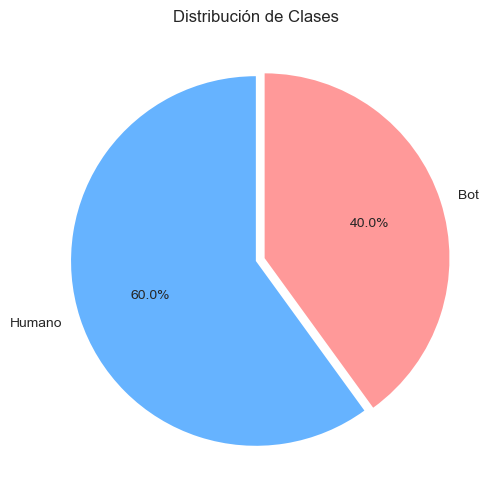

In [51]:
# ===  DISTRIBUCIÓN DE CLASES ===
class_dist = df['is_bot'].value_counts().sort_index()
total = len(df)
humanos = class_dist[0]
bots = class_dist[1]
print(f"Distribución de clases: {humanos} humanos ({humanos/total:.1%}), {bots} bots ({bots/total:.1%})")

# 1. Pie Chart
plt.figure(figsize=(8, 6))
df['is_bot'].value_counts().plot.pie(
    labels=['Humano', 'Bot'], autopct='%1.1f%%', startangle=90,
    colors=['#66b3ff', '#ff9999'], explode=(0, 0.05)
)
plt.title('Distribución de Clases')
plt.ylabel('')
plt.savefig("figures/class_distribution_pie.png", dpi=300, bbox_inches='tight')
plt.show()

In [53]:
# Mostrar información básica
print("Shape:", df.shape)
print(df.info())


Shape: (2357, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2357 non-null   int64  
 1   username            2357 non-null   object 
 2   frequency           2357 non-null   float64
 3   avg_message_length  2357 non-null   float64
 4   total_messages      2357 non-null   int64  
 5   url_ratio           2357 non-null   float64
 6   repetition_ratio    2357 non-null   float64
 7   time_in_channel     2357 non-null   int64  
 8   suspicious_links    2357 non-null   int64  
 9   generic_name        2357 non-null   int64  
 10  username_length     2357 non-null   int64  
 11  has_numbers         2357 non-null   int64  
 12  has_underscore      2357 non-null   int64  
 13  numeric_ratio       2357 non-null   float64
 14  uppercase_ratio     2357 non-null   float64
 15  special_char_count  2357 non-null   i

In [55]:
print("\nValores nulos:\n", df.isnull().sum())
print("\nPrimeras 5 filas:")
display(df.head())


Valores nulos:
 user_id               0
username              0
frequency             0
avg_message_length    0
total_messages        0
url_ratio             0
repetition_ratio      0
time_in_channel       0
suspicious_links      0
generic_name          0
username_length       0
has_numbers           0
has_underscore        0
numeric_ratio         0
uppercase_ratio       0
special_char_count    0
is_bot                0
dtype: int64

Primeras 5 filas:


,user_id,username,frequency,avg_message_length,total_messages,url_ratio,repetition_ratio,time_in_channel,suspicious_links,generic_name,username_length,has_numbers,has_underscore,numeric_ratio,uppercase_ratio,special_char_count,is_bot
0,14571583,alevidallet,0.008197,61.000000,1,1.000000,1.0,122,0,0,11,0,0,0.0,0.000000,0,1
1,31786811,Mamamel,0.006849,18.000000,1,0.000000,1.0,146,0,0,7,0,0,0.0,0.142857,0,0
2,81728471,ddu10,0.057692,61.166667,12,0.916667,2.0,208,0,0,5,1,0,0.4,0.000000,0,1
3,80625623,ariadnaa00,0.043956,69.000000,4,1.000000,4.0,91,0,0,10,1,0,0.2,0.000000,0,1
4,79474351,cviento,0.030303,64.000000,1,0.000000,1.0,33,0,0,7,0,0,0.0,0.000000,0,0


In [57]:
# ===  ESTADÍSTICAS DESCRIPTIVAS ===
desc = df.describe(include='all').T
desc['count'] = desc['count'].astype(int)
desc = desc.round(4)
display(desc)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,2357,NaN,NaN,NaN,47213708.341536,23370846.640874,9082.0,31858694.0,48426994.0,64764396.0,83610897.0
username,2357,1431,sebasguti08,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frequency,2357,NaN,NaN,NaN,0.128328,0.395307,0.004167,0.013699,0.033333,0.110553,11.857143
avg_message_length,2357,NaN,NaN,NaN,41.003686,32.347714,2.0,18.0,26.0,61.0,455.0
total_messages,2357,NaN,NaN,NaN,7.924905,11.2391,1.0,1.0,3.0,12.0,87.0
url_ratio,2357,NaN,NaN,NaN,0.377009,0.46288,0.0,0.0,0.0,1.0,1.0
repetition_ratio,2357,NaN,NaN,NaN,2.604383,3.393378,1.0,1.0,1.0,3.0,40.0
time_in_channel,2357,NaN,NaN,NaN,111.543063,63.008525,5.0,67.0,110.0,158.0,240.0
suspicious_links,2357,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
generic_name,2357,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# ===  EJEMPLOS REPRESENTATIVOS ===
print("\nEjemplos de bots (is_bot = 1):")
bots_sample = df[df['is_bot'] == 1][['username', 'frequency', 'total_messages', 'url_ratio', 'avg_message_length']].sample(3, random_state=42)
display(bots_sample)

print("\nEjemplos de humanos (is_bot = 0):")
humanos_sample = df[df['is_bot'] == 0][['username', 'frequency', 'total_messages', 'url_ratio', 'avg_message_length']].sample(3, random_state=42)
display(humanos_sample)


Ejemplos de bots (is_bot = 1):


,username,frequency,total_messages,url_ratio,avg_message_length
224,RenatalvsMatiasRecalt,0.208791,19,0.736842,76.157895
688,bardera_67,0.227545,38,0.973684,44.631579
2068,benjiespin,0.764706,13,1.000000,53.230769



Ejemplos de humanos (is_bot = 0):


,username,frequency,total_messages,url_ratio,avg_message_length
1342,ibaibailamos,0.026455,5,0.0,15.4
1515,pavitosovietico,0.016129,1,0.0,163.0
564,yellowdino,0.033058,4,0.0,17.0


# Top 10 Usuarios Más Frecuentes

C:\Users\agust\AppData\Local\Temp\ipykernel_2632\3560834392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


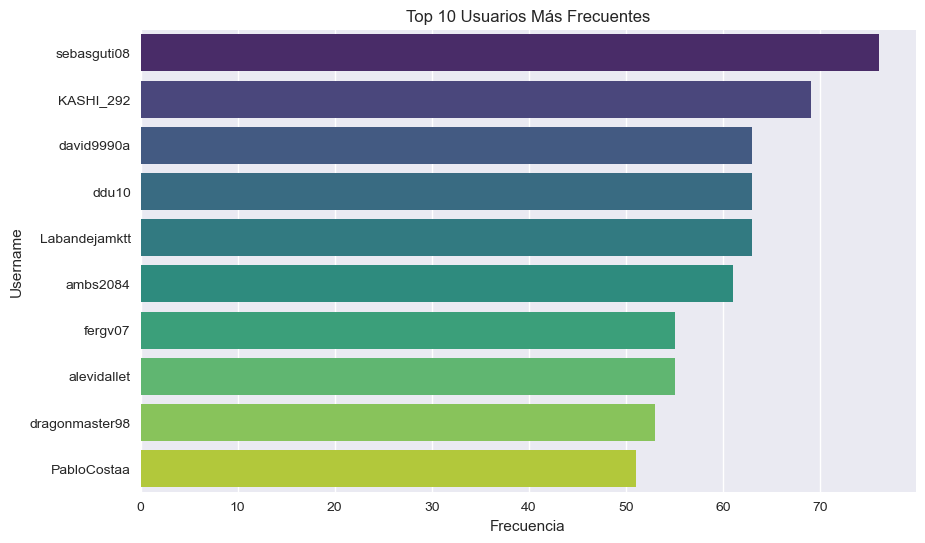

In [71]:
top_users = df['username'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top 10 Usuarios Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Username')
plt.savefig("figures/top10us.png", dpi=300, bbox_inches='tight')
plt.show()

# Mensajes Totales vs Frecuencia

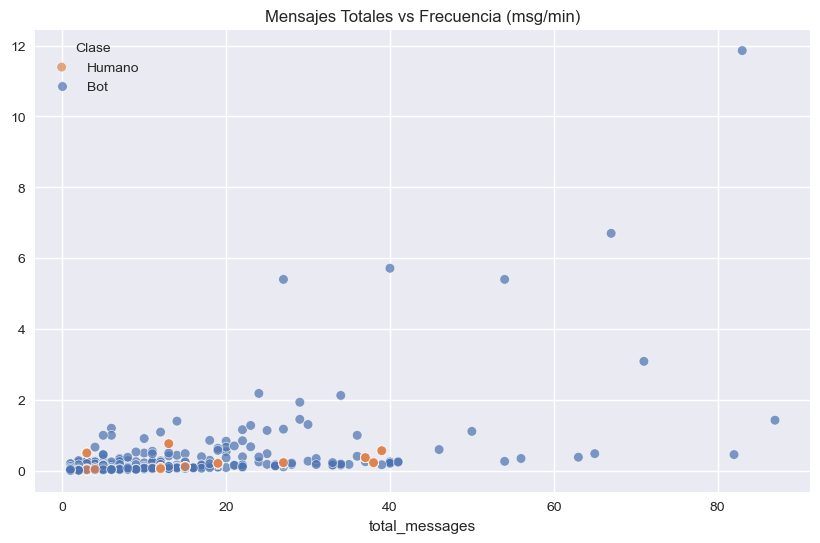

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_messages', y='frequency', hue='is_bot', alpha=0.7, palette='deep')
plt.title('Mensajes Totales vs Frecuencia (msg/min)')
plt.legend(title='Clase', labels=['Humano', 'Bot'])

plt.ylabel('')
plt.savefig("figures/msjvsfq.png", dpi=300, bbox_inches='tight')
plt.show()